In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv
/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_lter.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguin = pd.read_csv('/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv')

In [4]:
penguin.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [5]:
penguin.tail(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [6]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
missing_value = penguin.isnull().sum()

In [9]:
missing_value

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Data Cleaning

In [10]:
# Remove NaN Values

penguins = penguin.dropna()

In [11]:
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [12]:
# Remove duplicates values

penguins_clean = penguins.drop_duplicates()

In [13]:
penguins_clean

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [19]:
# Convert categorical variables to numerical variables focused on objects in info

penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'])

In [20]:
penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,False,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,False,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,False,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,True,True,False,False,False,True,False
340,46.8,14.3,215.0,4850.0,False,False,True,True,False,False,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,True,True,False,False,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,True,True,False,False,False,True,False


In [21]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   334 non-null    float64
 1   culmen_depth_mm    334 non-null    float64
 2   flipper_length_mm  334 non-null    float64
 3   body_mass_g        334 non-null    float64
 4   species_Adelie     334 non-null    bool   
 5   species_Chinstrap  334 non-null    bool   
 6   species_Gentoo     334 non-null    bool   
 7   island_Biscoe      334 non-null    bool   
 8   island_Dream       334 non-null    bool   
 9   island_Torgersen   334 non-null    bool   
 10  sex_.              334 non-null    bool   
 11  sex_FEMALE         334 non-null    bool   
 12  sex_MALE           334 non-null    bool   
dtypes: bool(9), float64(4)
memory usage: 16.0 KB


Summary Statistic

In [22]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


See the most values in count_values

In [24]:
penguins.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_.',
       'sex_FEMALE', 'sex_MALE'],
      dtype='object')

In [25]:
penguins['culmen_length_mm'].value_counts()

culmen_length_mm
41.1    7
45.2    6
50.5    5
39.6    5
45.5    5
       ..
35.6    1
37.5    1
36.8    1
43.1    1
49.9    1
Name: count, Length: 163, dtype: int64

In [26]:
penguins['culmen_depth_mm'].value_counts()

culmen_depth_mm
17.0    12
18.5    10
17.9    10
15.0    10
18.6    10
        ..
20.1     1
20.6     1
14.9     1
13.2     1
20.8     1
Name: count, Length: 79, dtype: int64

In [27]:
penguins['flipper_length_mm'].value_counts()

flipper_length_mm
190.0    21
195.0    17
187.0    16
193.0    14
210.0    14
191.0    13
215.0    12
197.0    10
196.0    10
185.0     9
220.0     8
198.0     8
208.0     8
181.0     7
230.0     7
184.0     7
189.0     7
192.0     7
212.0     7
201.0     6
217.0     6
216.0     6
213.0     6
222.0     6
186.0     6
199.0     6
188.0     6
203.0     5
218.0     5
194.0     5
221.0     5
209.0     5
219.0     5
214.0     5
202.0     4
228.0     4
200.0     4
180.0     4
225.0     4
178.0     4
182.0     3
205.0     3
224.0     3
223.0     2
229.0     2
211.0     2
183.0     2
207.0     2
176.0     1
174.0     1
231.0     1
206.0     1
172.0     1
226.0     1
Name: count, dtype: int64

In [28]:
penguins['body_mass_g'].value_counts()

body_mass_g
3800.0    12
3900.0    10
3700.0    10
3950.0    10
3550.0     9
          ..
3975.0     1
3575.0     1
3850.0     1
2700.0     1
5750.0     1
Name: count, Length: 93, dtype: int64

In [40]:
penguins['sex_.'].value_counts()

sex_.
False    333
True       1
Name: count, dtype: int64

Probability With Chi Method

In [30]:
penguins.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_.',
       'sex_FEMALE', 'sex_MALE'],
      dtype='object')

In [33]:
from scipy.stats import chi2_contingency

# Define a function to perform Chi-square test and print results
def perform_chi2_test(df, col1, col2):
    # Creating a contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])
    # Performing the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Printing results
    print(f"Chi-square test between {col1} and {col2}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("\n")

# Perform Chi-square tests for specified relationships ( refer to columns )
perform_chi2_test(penguins, 'culmen_length_mm', 'sex_.')
perform_chi2_test(penguins, 'culmen_depth_mm', 'sex_.')
perform_chi2_test(penguins, 'body_mass_g', 'sex_.')

Chi-square test between culmen_length_mm and sex_.:
Chi-square statistic: 166.49849849849852
P-value: 0.38797408097431657
Degrees of freedom: 162


Chi-square test between culmen_depth_mm and sex_.:
Chi-square statistic: 54.830830830830834
P-value: 0.9785239186722302
Degrees of freedom: 78


Chi-square test between body_mass_g and sex_.:
Chi-square statistic: 110.66466466466468
P-value: 0.08996303575266765
Degrees of freedom: 92




1. culmen_length_mm and sex_

* Chi-square statistic: 166.49849849849852 (This is a very high value)

* P-value: 0.38797408097431657

* Interpretation: The high Chi-square statistic suggests a strong deviation from the expected frequencies if there were no relationship between culmen length (beak length) and sex. However, the high p-value indicates that this deviation could be due to chance. This implies there might not be a strong association between the two variables.\

2. culmen_depth_mm and sex_

* Chi-square statistic: 54.830830830830834 (A moderately high value)

* P-value: 0.9785239186722302 (Very high p-value)

* Interpretation: This combination shows a very weak association between culmen depth (beak depth) and the sex of the penguins. The high p-value indicates that any differences you're seeing in culmen depth across sexes are very likely a result of random variation rather than an actual relationship.

3. body_mass_g and sex_

* Chi-square statistic: 110.66466466466468 (High value)

* P-value: 0.08996303575266765 (Moderately low p-value)

* Interpretation: This result suggests a potential association exists between body mass and the sex of penguins in the dataset. The p-value is close to the common significance threshold of 0.05, so while not a conclusive relationship, it does warrant further investigation.

Data Visualization

In [23]:
penguins.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_.',
       'sex_FEMALE', 'sex_MALE'],
      dtype='object')

In [ ]:
penguins['culmen_length_mm'].head(10).value_counts().plot(kind='bar')
plt.show()

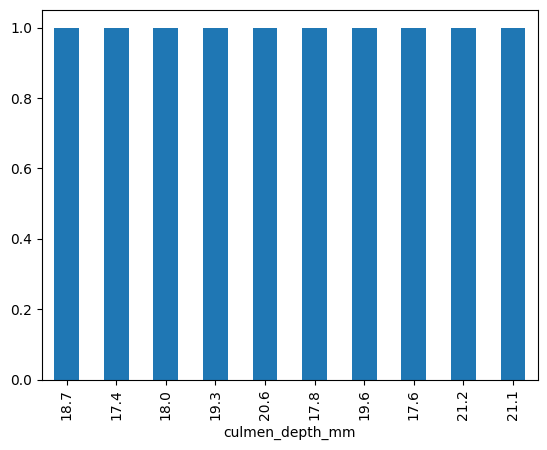

In [46]:
penguins['culmen_depth_mm'].head(10).value_counts().plot(kind='bar')
plt.show()

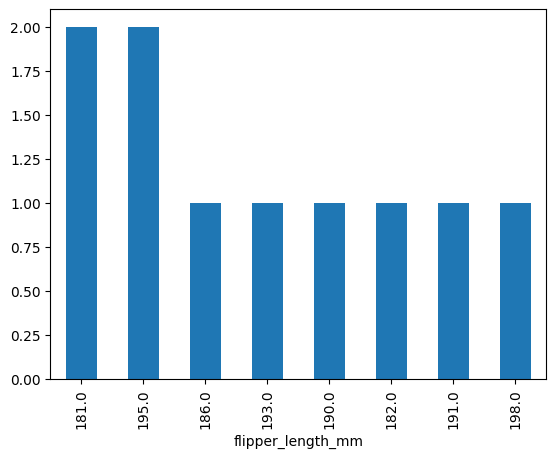

In [47]:
penguins['flipper_length_mm'].head(10).value_counts().plot(kind='bar')
plt.show()

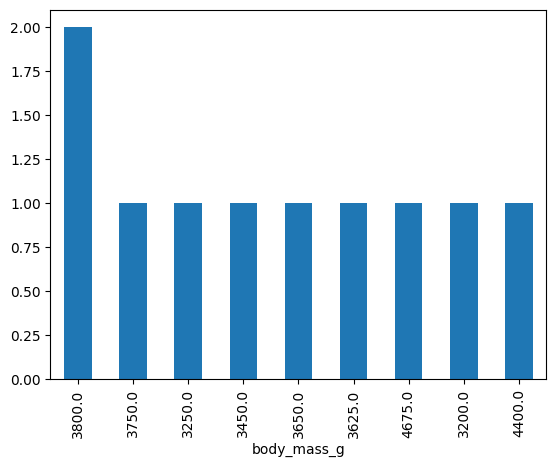

In [48]:
penguins['body_mass_g'].head(10).value_counts().plot(kind='bar')
plt.show()

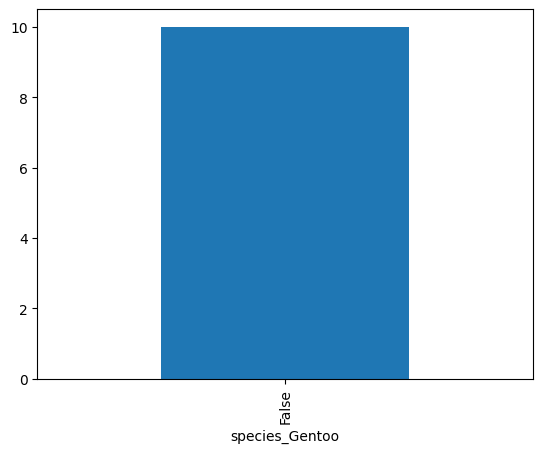

In [49]:
penguins['species_Gentoo'].head(10).value_counts().plot(kind='bar')
plt.show()

In [ ]:
penguins['species_Chinstrap'].head(10).value_counts().plot(kind='bar')
plt.show()

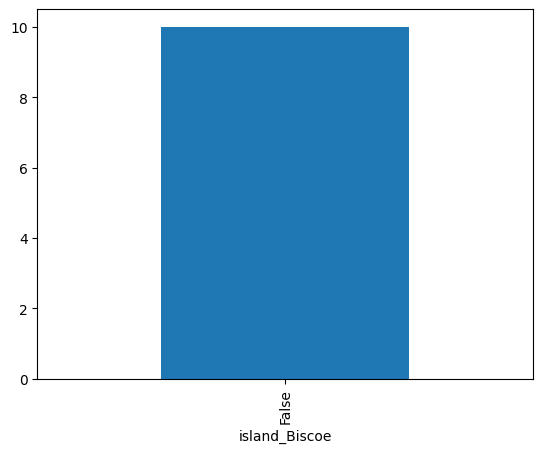

In [50]:
penguins['island_Biscoe'].head(10).value_counts().plot(kind='bar')
plt.show()

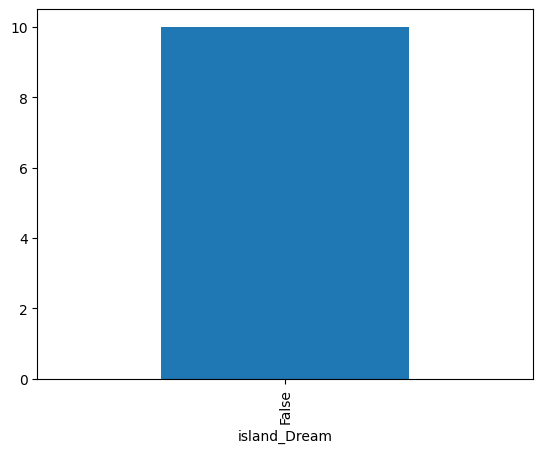

In [51]:
penguins['island_Dream'].head(10).value_counts().plot(kind='bar')
plt.show()

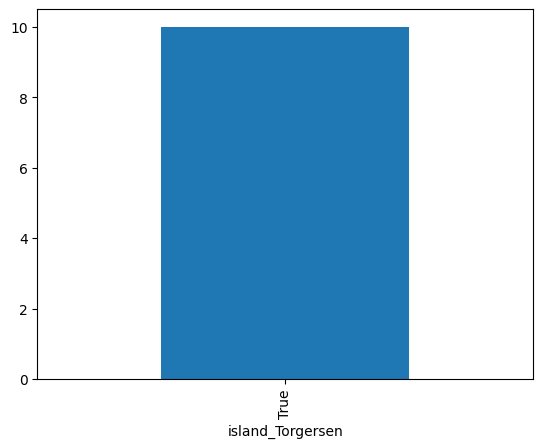

In [52]:
penguins['island_Torgersen'].head(10).value_counts().plot(kind='bar')
plt.show()

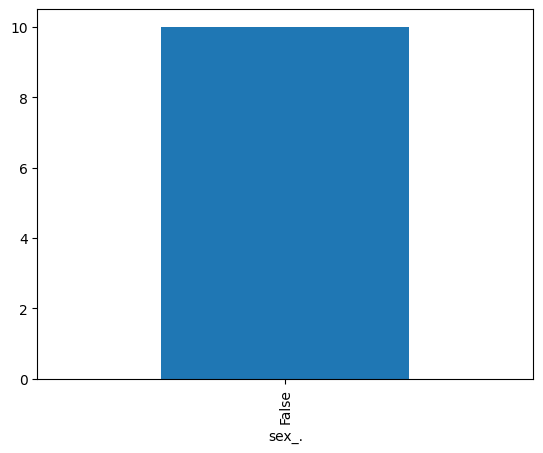

In [53]:
penguins['sex_.'].head(10).value_counts().plot(kind='bar')
plt.show()

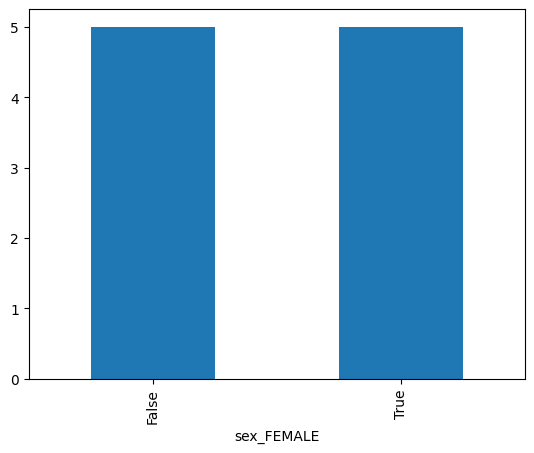

In [54]:
penguins['sex_FEMALE'].head(10).value_counts().plot(kind='bar')
plt.show()

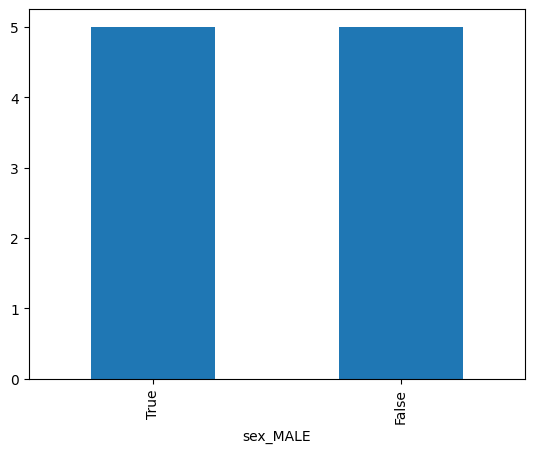

In [55]:
penguins['sex_MALE'].head(10).value_counts().plot(kind='bar')
plt.show()

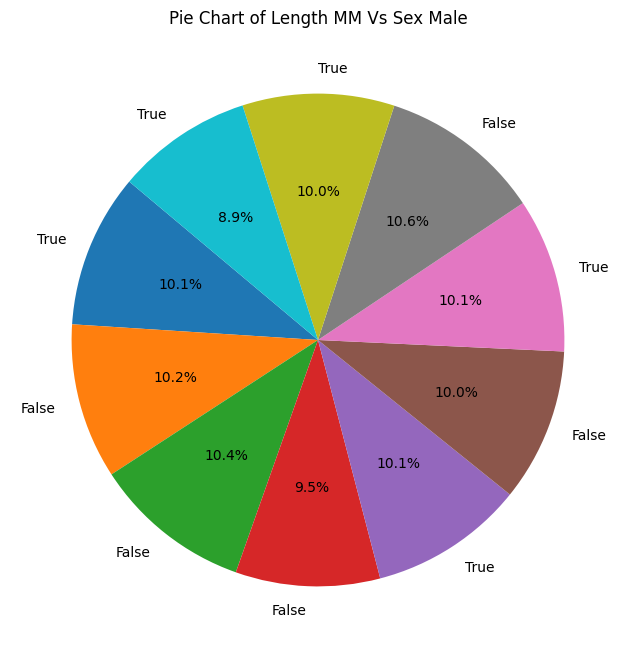

In [45]:
# Piechart of culmen_length_mm vs sex male

# Select the first 10 rows
df_top10 = penguins.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(df_top10['culmen_length_mm'], labels=df_top10['sex_MALE'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Length MM Vs Sex Male')
plt.show()

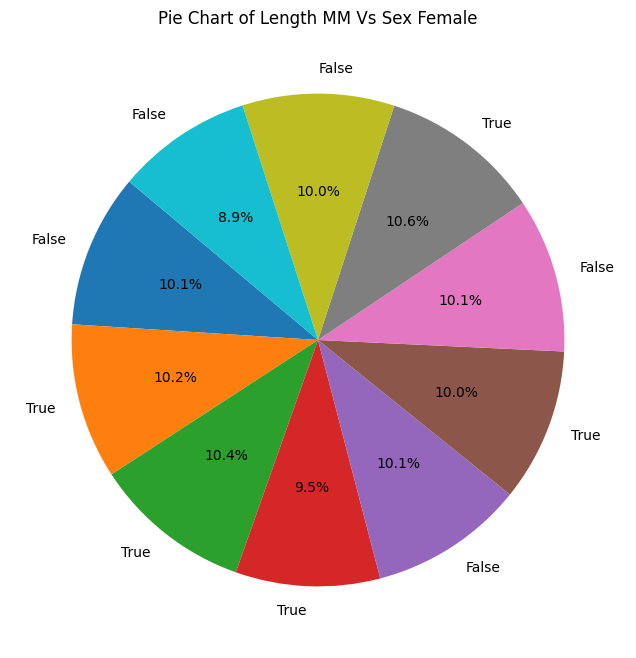

In [44]:
# Piechart of culmen_length_mm vs sex female

# Select the first 10 rows
df_top10 = penguins.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(df_top10['culmen_length_mm'], labels=df_top10['sex_FEMALE'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Length MM Vs Sex Female')
plt.show()

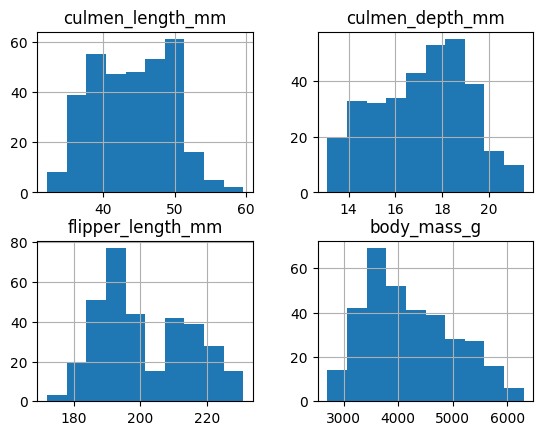

In [43]:
# Histogram 

penguins.hist()
plt.show()

Scatter plot

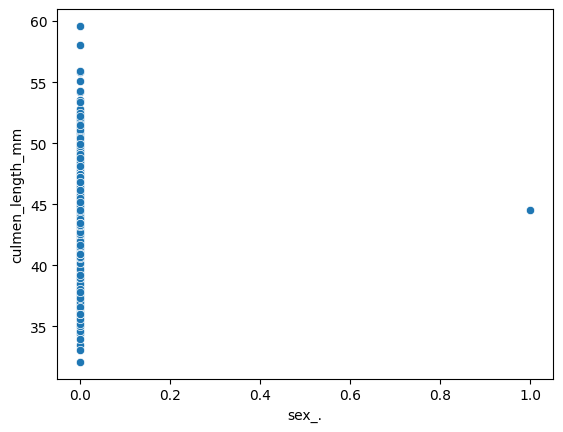

In [38]:
# Scatter plot for sex vs culmen length mm

sns.scatterplot(data=penguins, x='sex_.', y='culmen_length_mm')
plt.show()

from culmen length mm have strong relationship between 0.0 in sex

Machine learning with linear regression

In [41]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a copy of the data
data_copy = penguins.copy()

# Convert boolean columns to numerical columns
data_copy['sex_.'] = data_copy['sex_.'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_copy.drop('sex_FEMALE', axis=1), data_copy['sex_MALE'], test_size=0.25, random_state=0)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 1.0  is perfect predictions for every single data point during evaluation

In [56]:
# Calculate the correlation matrix
corr_matrix = penguins.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.228640           0.652126   
culmen_depth_mm           -0.228640         1.000000          -0.578730   
flipper_length_mm          0.652126        -0.578730           1.000000   
body_mass_g                0.589066        -0.472987           0.873211   
species_Adelie            -0.835667         0.532248          -0.686826   
species_Chinstrap          0.448779         0.324241          -0.187472   
species_Gentoo             0.487312        -0.822388           0.867414   
island_Biscoe              0.225104        -0.627008           0.602504   
island_Dream               0.031877         0.458251          -0.426871   
island_Torgersen          -0.367839         0.265791          -0.274089   
sex_.                      0.005083        -0.040730           0.062564   
sex_FEMALE                -0.343844        -0.369612          -0.257683   
sex_M

In [58]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [1.   1.   1.   0.98 1.  ]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [59]:
# Create a kNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the kNN model to the training data
knn.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the kNN model
accuracy = accuracy_score(y_test, y_pred)
print("kNN Accuracy:", accuracy)

kNN Accuracy: 0.7380952380952381


This implies that out of every 100 new examples, my model would likely get the prediction right about 74 times.

In [71]:
penguins.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_.',
       'sex_FEMALE', 'sex_MALE'],
      dtype='object')

Predict Culmen Length MM in penguins

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder  # Assuming you need this

X = penguins.drop('culmen_length_mm', axis=1)  # Assuming 'species' is your target
y = penguins['culmen_length_mm']

categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore') 
X_categorical = encoder.fit_transform(X[categorical_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predicted_values = model.predict(X_test) 


In [73]:
predicted_length_mm_penguins = pd.Series(predicted_values)

In [74]:
predicted_length_mm_penguins

0     37.918
1     46.736
2     41.895
3     46.589
4     42.170
       ...  
62    46.361
63    38.262
64    42.012
65    48.342
66    37.536
Length: 67, dtype: float64

Predict Culmen Depth MM in penguins

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder  # Assuming you need this

X = penguins.drop('culmen_depth_mm', axis=1)  # Assuming 'species' is your target
y = penguins['culmen_depth_mm']

categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore') 
X_categorical = encoder.fit_transform(X[categorical_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predicted_values = model.predict(X_test) 

In [77]:
predicted_depth_mm_penguins = pd.Series(predicted_values)

In [79]:
predicted_depth_mm_penguins

0     17.798
1     14.446
2     18.931
3     17.810
4     18.609
       ...  
62    14.188
63    18.278
64    19.884
65    15.649
66    17.343
Length: 67, dtype: float64